## Import data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

/var/folders/nx/nd5hy9z92p18k3jpbyyqw3m80000gn/T/ipykernel_80367/1526916513.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_master = pd.read_csv("../data/Train.csv")
df = df_master.copy()
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [3]:
df.shape

(2154048, 19)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [5]:
round(df.isna().sum().sort_values(ascending=False) / len(df), 4) * 100

ZONE2             93.65
ZONE1             92.12
TIGO              59.89
DATA_VOLUME       49.23
FREQ_TOP_PACK     41.90
TOP_PACK          41.90
ORANGE            41.56
REGION            39.43
ON_NET            36.52
MONTANT           35.13
FREQUENCE_RECH    35.13
REVENUE           33.71
ARPU_SEGMENT      33.71
FREQUENCE         33.71
REGULARITY         0.00
user_id            0.00
MRG                0.00
TENURE             0.00
CHURN              0.00
dtype: float64

In [6]:
df.TOP_PACK.unique()

array(['On net 200F=Unlimited _call24H', nan, 'On-net 1000F=10MilF;10d',
       'Data:1000F=5GB,7d', 'Mixt 250F=Unlimited_call24H',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'All-net 500F=2000F;5d', 'On-net 500F_FNF;3d',
       'Data: 100 F=40MB,24H', 'MIXT: 200mnoff net _unl on net _5Go;30d',
       'Jokko_Daily', 'Data: 200 F=100MB,24H', 'Data:490F=1GB,7d',
       'Twter_U2opia_Daily', 'On-net 500=4000,10d', 'Data:1000F=2GB,30d',
       'IVR Echat_Daily_50F', 'Pilot_Youth4_490',
       'All-net 500F =2000F_AllNet_Unlimited', 'Twter_U2opia_Weekly',
       'Data:200F=Unlimited,24H', 'On-net 200F=60mn;1d',
       'All-net 600F= 3000F ;5d', 'Pilot_Youth1_290',
       'All-net 1000F=(3000F On+3000F Off);5d', 'VAS(IVR_Radio_Daily)',
       'Data:3000F=10GB,30d', 'All-net 1000=5000;5d',
       'Twter_U2opia_Monthly', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'FNF2 ( JAPPANTE)', 'Yewouleen_PKG', 'Data:150F=SPPackage1,24H',
       'WIFI_Family_2MBPS', 'Data:500F=2GB,2

In [7]:
df.REGION.unique() 

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [8]:
df.MRG.unique()

array(['NO'], dtype=object)

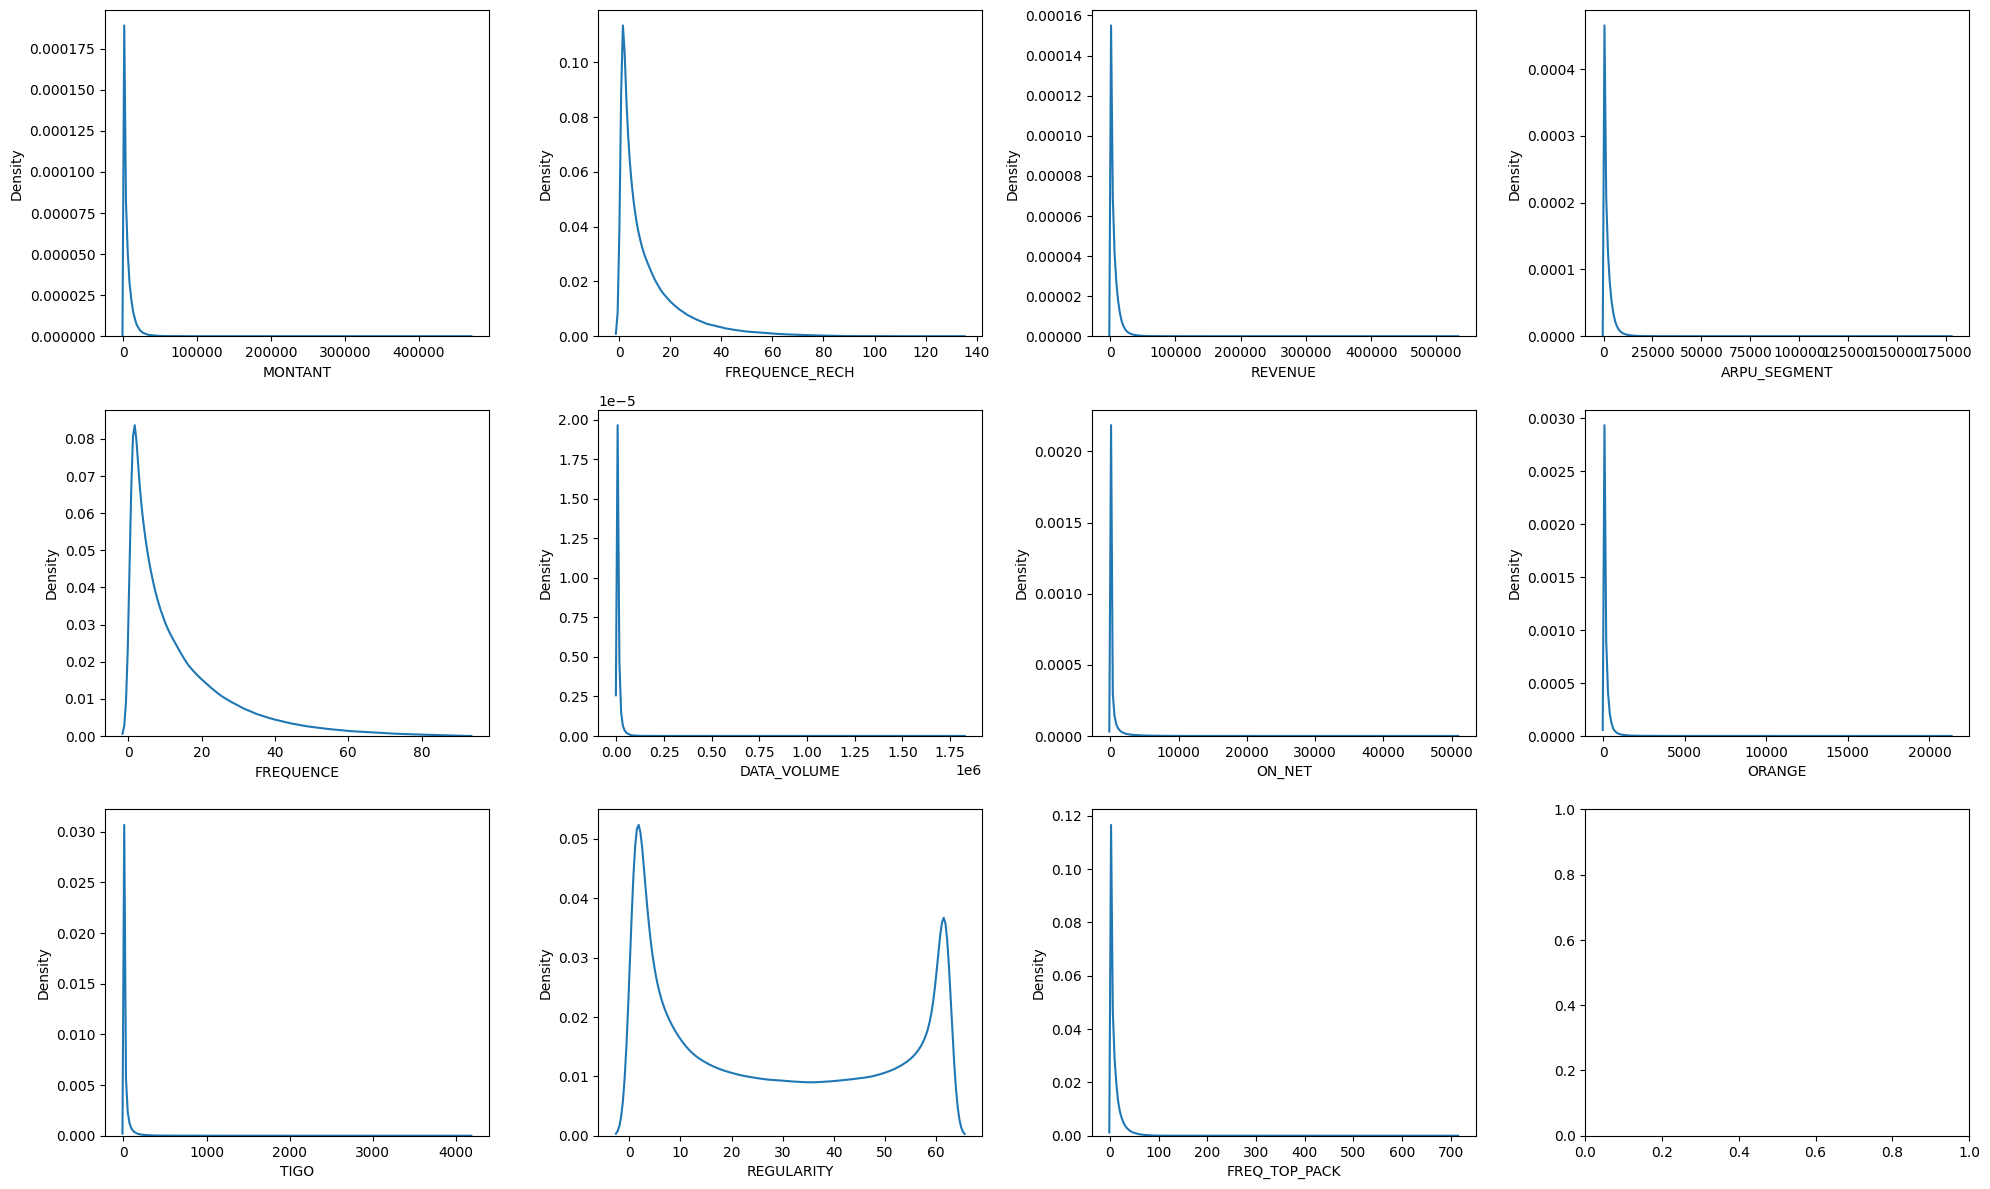

In [9]:
fig, axes = plt.subplots(3, 4, figsize=(20, 12))

sns.kdeplot(data=df, x="MONTANT", ax=axes[0, 0])
sns.kdeplot(data=df, x="FREQUENCE_RECH", ax=axes[0, 1])
sns.kdeplot(data=df, x="REVENUE", ax=axes[0, 2])
sns.kdeplot(data=df, x="ARPU_SEGMENT", ax=axes[0, 3])

sns.kdeplot(data=df, x="FREQUENCE", ax=axes[1, 0])
sns.kdeplot(data=df, x="DATA_VOLUME", ax=axes[1, 1])
sns.kdeplot(data=df, x="ON_NET", ax=axes[1, 2])
sns.kdeplot(data=df, x="ORANGE", ax=axes[1, 3])

sns.kdeplot(data=df, x="TIGO", ax=axes[2, 0])
sns.kdeplot(data=df, x="REGULARITY", ax=axes[2, 1])
sns.kdeplot(data=df, x="FREQ_TOP_PACK", ax=axes[2, 2])

plt.tight_layout()
plt.show()

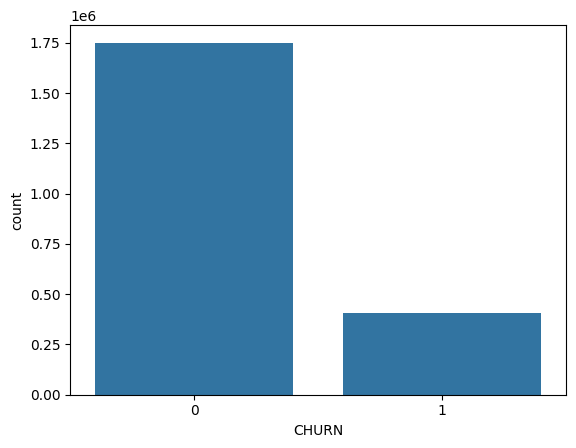

In [10]:
sns.countplot(data=df, x="CHURN")
plt.show()

## Data preprocessing

In [11]:
# Resampling

In [12]:
df_nnull = df.dropna(subset=["REGION", "TOP_PACK"])

In [13]:
X = df_nnull.drop(["user_id", "MRG", "ZONE1", "ZONE2", "CHURN"], axis=1)
y = df_nnull.CHURN

In [14]:
X = df.drop(["user_id", "MRG", "ZONE1", "ZONE2", "CHURN"], axis=1)
y = df.CHURN

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1938643, 14)
(215405, 14)


In [16]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(categorical_cols)
print(numerical_cols)

Index(['REGION', 'TENURE', 'TOP_PACK'], dtype='object')
Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'FREQ_TOP_PACK'],
      dtype='object')


In [17]:
"""
preprocessor = ColumnTransformer(
    transformers=[
        ('fill', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing'), categorical_cols),
        ('impute', SimpleImputer(strategy='median'), numerical_cols),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ], remainder="passthrough")
"""

preprocessor = ColumnTransformer(
    transformers=[
        # Impute missing values in categorical columns and then apply one-hot encoding
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols),
        # Impute missing values in numerical columns and then apply scaling
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ], remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Model Training

In [18]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_processed.shape[1], activation='relu'))
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               44800     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 86017 (336.00 KB)
Trainable params: 86017 

model = Sequential()

# Input layer
model.add(Dense(256, input_dim=X_train_processed.shape[1], kernel_initializer=HeNormal(), kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

# Hidden layers
model.add(Dense(128, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Add dropout
model.add(BatchNormalization())

model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Add dropout
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.summary()

In [19]:
#optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, clipvalue=0.5)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
with tf.device('/cpu:0'):
    model.fit(X_train_processed, y_train, epochs=10, batch_size=64, validation_data=(X_test_processed, y_test))

Epoch 1/10
30292/30292 [==============================] - 219s 7ms/step - loss: 0.2588 - accuracy: 0.8776 - val_loss: 0.2553 - val_accuracy: 0.8783
Epoch 2/10
30292/30292 [==============================] - 122s 4ms/step - loss: 0.2568 - accuracy: 0.8780 - val_loss: 0.2566 - val_accuracy: 0.8766
Epoch 3/10
30292/30292 [==============================] - 108s 4ms/step - loss: 0.2563 - accuracy: 0.8782 - val_loss: 0.2546 - val_accuracy: 0.8788
Epoch 4/10
30292/30292 [==============================] - 105s 3ms/step - loss: 0.2560 - accuracy: 0.8783 - val_loss: 0.2540 - val_accuracy: 0.8793
Epoch 5/10
30292/30292 [==============================] - 101s 3ms/step - loss: 0.2559 - accuracy: 0.8781 - val_loss: 0.2538 - val_accuracy: 0.8793
Epoch 6/10
30292/30292 [==============================] - 93s 3ms/step - loss: 0.2559 - accuracy: 0.8782 - val_loss: 0.2543 - val_accuracy: 0.8794
Epoch 7/10
30292/30292 [==============================] - 107s 4ms/step - loss: 0.2557 - accuracy: 0.8783 - val_l

with tf.device('/cpu:0'):
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # to halt training if the loss becomes NaN
    model.fit(X_train_processed, y_train, epochs=10, batch_size=64, validation_data=(X_test_processed, y_test), callbacks=[callback])

In [21]:
loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

6732/6732 [==============================] - 10s 1ms/step - loss: 0.2538 - accuracy: 0.8793
Test Loss: 0.2537769675254822, Test Accuracy: 0.879306435585022
